In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers.legacy import Adam
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("combined.csv")
data = data.drop("date.1", axis=1)
data

,date,temperature,rain,wind_speed,wind_direction,humidity,pressure,total_cloud,visibility,solar_radiation
0,2017-01-01 00:00:00,4.2,0.0,2.1,320.0,68.0,1021.5,0.0,20000.0,0.0
1,2017-01-01 01:00:00,4.1,0.0,1.9,320.0,67.0,1021.4,0.0,20000.0,0.0
2,2017-01-01 02:00:00,3.9,0.0,1.0,250.0,68.0,1021.7,0.0,20000.0,0.0
3,2017-01-01 03:00:00,3.7,0.0,1.9,320.0,70.0,1021.6,0.0,20000.0,0.0
4,2017-01-01 04:00:00,3.6,0.0,1.1,50.0,72.0,1020.7,0.0,17950.0,0.0
...,...,...,...,...,...,...,...,...,...,...
59562,2023-10-18 19:00:00,18.7,0.0,1.8,180.0,72.0,15.5,2.0,4057.0,0.0
59563,2023-10-18 20:00:00,16.4,0.0,0.7,200.0,84.0,15.6,3.0,3245.0,0.0
59564,2023-10-18 21:00:00,14.4,0.0,0.5,70.0,88.0,14.4,6.0,2590.0,0.0
59565,2023-10-18 22:00:00,13.0,0.0,0.1,0.0,92.0,13.7,5.0,1632.0,0.0


In [3]:
split_size = round(len(data) * 0.7)
split_size

41697

In [4]:
train_df = data.iloc[:split_size]
test_df = data.iloc[split_size:]
train_df

,date,temperature,rain,wind_speed,wind_direction,humidity,pressure,total_cloud,visibility,solar_radiation
0,2017-01-01 00:00:00,4.2,0.0,2.1,320.0,68.0,1021.5,0.0,20000.0,0.00
1,2017-01-01 01:00:00,4.1,0.0,1.9,320.0,67.0,1021.4,0.0,20000.0,0.00
2,2017-01-01 02:00:00,3.9,0.0,1.0,250.0,68.0,1021.7,0.0,20000.0,0.00
3,2017-01-01 03:00:00,3.7,0.0,1.9,320.0,70.0,1021.6,0.0,20000.0,0.00
4,2017-01-01 04:00:00,3.6,0.0,1.1,50.0,72.0,1020.7,0.0,17950.0,0.00
...,...,...,...,...,...,...,...,...,...,...
41692,2021-10-04 05:00:00,16.6,0.0,0.3,0.0,99.0,18.6,3.0,274.0,0.00
41693,2021-10-04 06:00:00,17.2,0.0,0.2,0.0,99.0,19.4,5.0,547.0,0.00
41694,2021-10-04 07:00:00,17.4,0.0,0.1,0.0,98.0,19.4,3.0,509.0,0.03
41695,2021-10-04 08:00:00,19.7,0.0,0.1,0.0,96.0,22.0,5.0,668.0,0.41


In [5]:
train_df["date"] = pd.to_datetime(train_df["date"])
test_df["date"]= pd.to_datetime(test_df["date"])



/var/folders/td/8pk_dg054tl5dgjkt99r7wf80000gn/T/ipykernel_70399/1568025912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["date"] = pd.to_datetime(train_df["date"])
/var/folders/td/8pk_dg054tl5dgjkt99r7wf80000gn/T/ipykernel_70399/1568025912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["date"]= pd.to_datetime(test_df["date"])


In [6]:
test_df = test_df.set_index("date")
train_df = train_df.set_index("date")

train_df

,temperature,rain,wind_speed,wind_direction,humidity,pressure,total_cloud,visibility,solar_radiation
date,,,,,,,,,
2017-01-01 00:00:00,4.2,0.0,2.1,320.0,68.0,1021.5,0.0,20000.0,0.00
2017-01-01 01:00:00,4.1,0.0,1.9,320.0,67.0,1021.4,0.0,20000.0,0.00
2017-01-01 02:00:00,3.9,0.0,1.0,250.0,68.0,1021.7,0.0,20000.0,0.00
2017-01-01 03:00:00,3.7,0.0,1.9,320.0,70.0,1021.6,0.0,20000.0,0.00
2017-01-01 04:00:00,3.6,0.0,1.1,50.0,72.0,1020.7,0.0,17950.0,0.00
...,...,...,...,...,...,...,...,...,...
2021-10-04 05:00:00,16.6,0.0,0.3,0.0,99.0,18.6,3.0,274.0,0.00
2021-10-04 06:00:00,17.2,0.0,0.2,0.0,99.0,19.4,5.0,547.0,0.00
2021-10-04 07:00:00,17.4,0.0,0.1,0.0,98.0,19.4,3.0,509.0,0.03


In [7]:
test_df

,temperature,rain,wind_speed,wind_direction,humidity,pressure,total_cloud,visibility,solar_radiation
date,,,,,,,,,
2021-10-04 10:00:00,26.5,0.0,1.3,200.0,79.0,27.2,2.0,1486.0,1.81
2021-10-04 11:00:00,27.5,0.0,2.4,160.0,73.0,26.8,7.0,1739.0,1.83
2021-10-04 12:00:00,27.7,0.0,1.9,160.0,67.0,24.9,7.0,1839.0,2.07
2021-10-04 13:00:00,29.0,0.0,1.7,140.0,62.0,24.7,5.0,1878.0,2.30
2021-10-04 14:00:00,28.7,0.0,2.4,270.0,60.0,23.5,1.0,1919.0,2.11
...,...,...,...,...,...,...,...,...,...
2023-10-18 19:00:00,18.7,0.0,1.8,180.0,72.0,15.5,2.0,4057.0,0.00
2023-10-18 20:00:00,16.4,0.0,0.7,200.0,84.0,15.6,3.0,3245.0,0.00
2023-10-18 21:00:00,14.4,0.0,0.5,70.0,88.0,14.4,6.0,2590.0,0.00


In [8]:
# scaler = MinMaxScaler()
# train_df = scaler.fit_transform(train_df)
# test_df = scaler.transform(test_df)
# train_df
train_x1 = train_df[["total_cloud", "rain", "visibility", "humidity"]]
train_x2 = train_df[["total_cloud", "rain", "visibility", "humidity", "wind_speed", "wind_direction", "pressure", "temperature"]]

train_y = train_df[["solar_radiation"]]

test_x1 = test_df[["total_cloud", "rain", "visibility", "humidity"]]
test_x2 = test_df[["total_cloud", "rain", "visibility", "humidity", "wind_speed", "wind_direction", "pressure", "temperature"]]

test_y = test_df[["solar_radiation"]]

train_x1_r = np.array(train_x1).reshape(train_x1.shape[0], train_x1.shape[1], 1)
train_x2_r = np.array(train_x2).reshape(train_x2.shape[0], train_x2.shape[1], 1)

train_y = np.array(train_y).reshape(train_y.shape[0], train_y.shape[1], 1)

test_x1_r = np.array(test_x1).reshape(test_x1.shape[0], test_x1.shape[1], 1)
test_x2_r = np.array(test_x2).reshape(test_x2.shape[0], test_x2.shape[1], 1)

test_y_r = np.array(test_y).reshape(test_y.shape[0], test_y.shape[1], 1)

In [9]:
train_x_tensor = tf.convert_to_tensor(train_x1_r, dtype=tf.float64)
train_x_tensor2 = tf.convert_to_tensor(train_x2_r, dtype=tf.float64)

train_y_tensor = tf.convert_to_tensor(train_y, dtype=tf.float64)
train_x_tensor.shape

TensorShape([41697, 4, 1])

Epoch 1/300
292/292 [==============================] - 2s 5ms/step - loss: 40118.1836 - val_loss: 29.8645
Epoch 2/300
292/292 [==============================] - 1s 2ms/step - loss: 16568.8887 - val_loss: 43.4184
Epoch 3/300
292/292 [==============================] - 1s 3ms/step - loss: 7816.7256 - val_loss: 3.3483
Epoch 4/300
292/292 [==============================] - 1s 2ms/step - loss: 741.8655 - val_loss: 3.6239
Epoch 5/300
292/292 [==============================] - 1s 2ms/step - loss: 161.3590 - val_loss: 3.0065
Epoch 6/300
292/292 [==============================] - 1s 2ms/step - loss: 59.6980 - val_loss: 2.0314
Epoch 7/300
292/292 [==============================] - 1s 2ms/step - loss: 27.1928 - val_loss: 1.5263
Epoch 8/300
292/292 [==============================] - 1s 2ms/step - loss: 13.0559 - val_loss: 1.3158
Epoch 9/300
292/292 [==============================] - 1s 2ms/step - loss: 6.5806 - val_loss: 1.1726
Epoch 10/300
292/292 [==============================] - 1s 2ms/step - l

<Axes: >

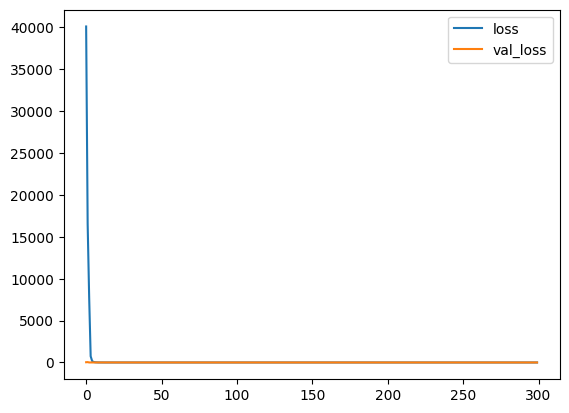

In [59]:
optimizer = Adam(learning_rate=0.0001)

model1 = Sequential()
model1.add(LSTM(48, activation="relu", input_shape=(train_x_tensor.shape[1],train_x_tensor.shape[2])))
model1.add(Dropout(rate=0.2))
model1.add(Dense(units=1))
model1.compile(loss="mse", optimizer=optimizer)

trained = model1.fit(train_x1, train_y, validation_split=0.3, batch_size=100, epochs=300)
pd.DataFrame.from_dict(trained.history).plot()

In [60]:
predicted1 = model1.predict(test_x1)
predicted1

559/559 [==============================] - 0s 500us/step


array([[0.3077201 ],
       [0.2661956 ],
       [0.35355595],
       ...,
       [0.07369238],
       [0.11774564],
       [0.06168908]], dtype=float32)

In [61]:
predicted1 = np.maximum(0, predicted1)
predicted1

array([[0.3077201 ],
       [0.2661956 ],
       [0.35355595],
       ...,
       [0.07369238],
       [0.11774564],
       [0.06168908]], dtype=float32)

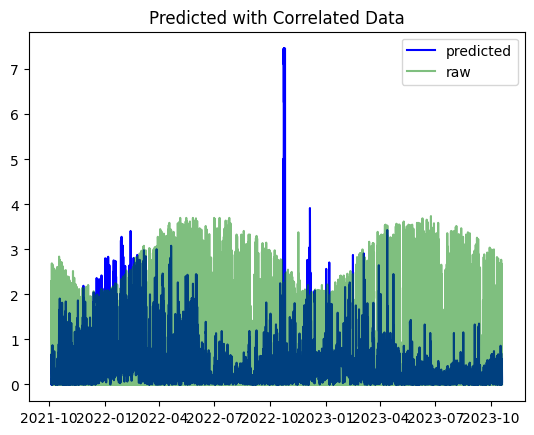

In [62]:
import matplotlib.pyplot as plt

plt.title("Predicted with Correlated Data")
plt.plot( test_y.index, predicted1, c="b", label="predicted")
plt.plot( test_y.index, test_y.values,c="g", alpha=.5, label="raw")
plt.legend(loc="best")
plt.savefig("corr_predict1_200_b_100")

In [63]:
from sklearn.metrics import mean_squared_error

test_y.values.shape

(17870, 1)

In [64]:
predicted1.shape

(17870, 1)

In [65]:
error = mean_squared_error(test_y.values, abs(predicted1))

print("MSE: {}, RMSE: {}".format(error, np.sqrt(error)))

MSE: 0.924477536763409, RMSE: 0.9614975490158095


Epoch 1/300
292/292 [==============================] - 2s 4ms/step - loss: 398.2830 - val_loss: 12.9201
Epoch 2/300
292/292 [==============================] - 1s 4ms/step - loss: 28.5305 - val_loss: 6.9731
Epoch 3/300
292/292 [==============================] - 1s 4ms/step - loss: 11.0123 - val_loss: 3.1286
Epoch 4/300
292/292 [==============================] - 1s 4ms/step - loss: 6.0554 - val_loss: 3.1530
Epoch 5/300
292/292 [==============================] - 1s 4ms/step - loss: 3.5434 - val_loss: 2.7944
Epoch 6/300
292/292 [==============================] - 1s 4ms/step - loss: 2.5020 - val_loss: 2.4195
Epoch 7/300
292/292 [==============================] - 1s 3ms/step - loss: 1.8543 - val_loss: 1.7447
Epoch 8/300
292/292 [==============================] - 1s 4ms/step - loss: 1.3830 - val_loss: 2.2817
Epoch 9/300
292/292 [==============================] - 1s 3ms/step - loss: 1.2593 - val_loss: 1.3864
Epoch 10/300
292/292 [==============================] - 1s 4ms/step - loss: 1.1459 - v

<Axes: >

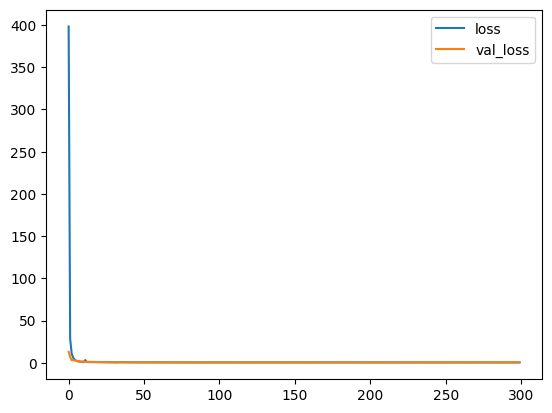

In [66]:
optimizer2 = Adam(learning_rate=0.0001)

model2 = Sequential()
model2.add(LSTM(48, activation="relu", input_shape=(train_x_tensor2.shape[1],train_x_tensor2.shape[2])))
model2.add(Dropout(rate=0.2))
model2.add(Dense(units=1))
model2.compile(loss="mse", optimizer=optimizer2)

trained2 = model2.fit(train_x2, train_y, validation_split=0.3, batch_size=100, epochs=300)
pd.DataFrame.from_dict(trained2.history).plot()

In [67]:
result2 = model1.predict(test_x2)
result2

559/559 [==============================] - 0s 661us/step


array([[-26.937418],
       [-13.771158],
       [-11.275077],
       ...,
       [ 99.31937 ],
       [101.99631 ],
       [105.96831 ]], dtype=float32)

In [68]:
result2 = np.maximum(0, result2)
result2

array([[  0.     ],
       [  0.     ],
       [  0.     ],
       ...,
       [ 99.31937],
       [101.99631],
       [105.96831]], dtype=float32)

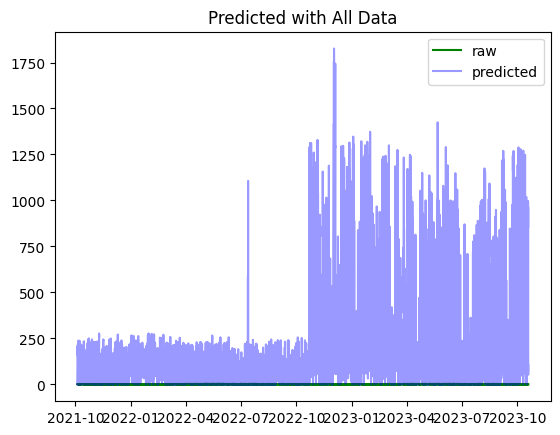

In [69]:
plt.title("Predicted with All Data")
plt.plot( test_y.index, test_y.values, c="g", label="raw")
plt.plot(  test_y.index, result2, c="b", alpha=.4, label="predicted")
plt.legend(loc="best")
plt.savefig("all_predict2_300_b_100")

In [70]:
error2 = mean_squared_error(test_y.values, abs(result2))
print("MSE: {}, RMSE: {}".format(error2, np.sqrt(error2)))

MSE: 99525.72353295049, RMSE: 315.47697781763804


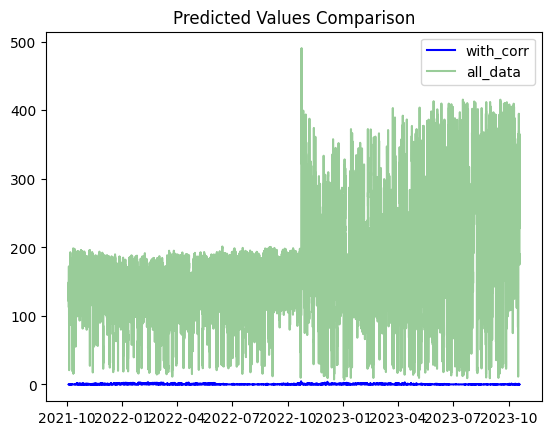

In [ ]:
import matplotlib.pyplot as plt

plt.title("Predicted Values Comparison")
plt.plot( test_y.index, abs(predicted1), c="b", label="with_corr")
plt.plot( test_y.index, abs(result2),c="g", label="all_data", alpha=.4)
plt.xticks()
plt.legend(loc="best")
plt.savefig("predict_compare")